In [79]:
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr, f_oneway, norm
from scipy.linalg import inv
import numpy as np
from numpy import linalg as LA

In [55]:
#datasets
cherry = pd.read_csv('datasets/691_adv_testQ1.csv', sep='\t')
flicker = pd.read_csv('datasets/691_adv_testQ2.csv', sep='\t')

1) Use the following data on cherry trees to determine if it is possible to predict the volume of
a cherry tree using its height or diameter (linear regression).
Run the regression using both height and diameter (multliple regression) and compare your
models. Which is a better predictor based on the information you have calculated. You can
use size of the residuals, p-values of the F-statistic, R squared value, etc. to make this
determination.

In [56]:
cherry.head()

,Diam,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [5]:
cherry.describe()

,Diam,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000


In [6]:
cherry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
Diam      31 non-null float64
Height    31 non-null int64
Volume    31 non-null float64
dtypes: float64(2), int64(1)
memory usage: 824.0 bytes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1190f39e8>,
      dtype=object)

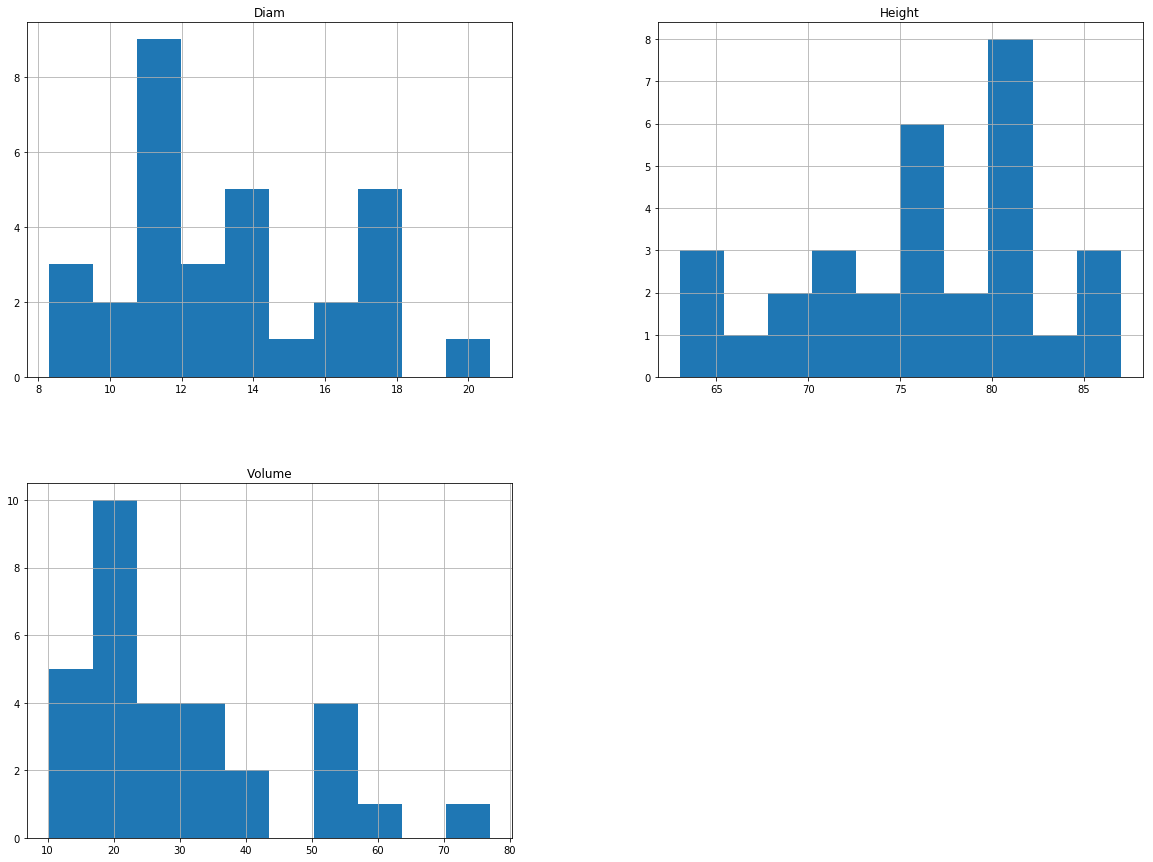

In [57]:
cherry.hist(figsize=(20,15))

look for correlation between attributes
using non-parametic -- spearmanr testfrom scipy

In [58]:
#correlation between diameter and volume
spearmanr(cherry.Diam, cherry.Volume)

SpearmanrResult(correlation=0.9547151218663545, pvalue=8.275706796760753e-17)

In [59]:
#correlation between height and volume
spearmanr(cherry.Height, cherry.Volume)

SpearmanrResult(correlation=0.5787100724375764, pvalue=0.0006483597619070405)

split dataframe into train and test sets

In [60]:
train_set, test_set = train_test_split(cherry, test_size=.2, random_state=42)

Isolate test set into feature and target

In [61]:
cher_test = test_set.drop('Volume', axis=1)
cher_labels_test = test_set['Volume'].copy()

Isolate Volume from training set (copy)

In [62]:
cher = train_set.drop('Volume', axis=1)
cher_labels = np.c_[train_set['Volume'].copy()]

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(cher, cher_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
sample_cher = cher.iloc[:5]
sample_cher_labe = cher_labels[:5]
cher_predictions = lin_reg.predict(sample_cher)

print("Predictions:", list(cher_predictions))

Predictions: [array([45.37673748]), array([22.0634112]), array([5.27748317]), array([20.68443245]), array([32.49910198])]


Compuete RMSE from Multiple Regression Prediction with full training set

In [71]:
full_cher_predict = lin_reg.predict(cher_test)
lin_mse = mean_squared_error(cher_labels_test, full_cher_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.427373017182986

Compute Linear Regression solely on Diameter attribute

In [66]:
# isolate cher_diam as numpy array
cher_diam = np.c_[cher['Diam']]
#create linear regression instance
lin1 = LinearRegression()

# fit lin1 using cher_diam and cher_labels
lin1.fit(cher_diam.reshape(-1,1), cher_labels)

t0,t1 = lin1.intercept_, lin1.coef_

y_test_pred = lin1.predict(cher_test['Diam'].values.reshape(-1,1))

#root mean squared error
lin_mse = mean_squared_error(cher_labels_test,y_test_pred)
lin_rmse = np.sqrt(lin_mse)

theta_svd, residuals, rank, s= LA.lstsq(cher_diam.reshape(-1,1), cher_labels)
print("RMSE:", lin_rmse)
print("Coefficient:", t1)
print("Intercept:", t0)

RMSE: 4.441715929648132
Coefficient: [[5.14669915]]
Intercept: [-37.55919774]


/Users/MasonBaran/ML_programs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Graph scatter plot with diamter as x and volume as y with predictor line

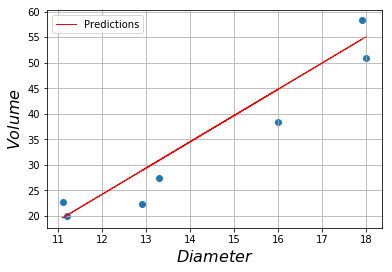

In [76]:
# scatter x y test 
plt.scatter(cher_test['Diam'], cher_labels_test, label="")
# plot line with x and y_pred 
plt.plot(cher_test['Diam'], y_test_pred, "r", linewidth=1, label="Predictions")
plt.grid(True)
plt.xlabel("$Diameter$", fontsize=16)
plt.ylabel("$Volume$", fontsize=16)
plt.legend(loc="upper left")

2) Use the following dataset to perform a one-way ANOVA to determine if there is a
relationship between eye colour and flicker frequency.
http://www.statsci.org/data/general/flicker.html
Start by determining if your data is normal or if it needs to be normalized. Draw an appropriate
graph to examine your data visually for outliers.
Analyse your findings and write a short report (600 words).
Describe where you found the data and what the data represents. Include screenshots or
code as appropriate in your report to demonstrate how you analysed the data as well as the
actual statistics values calculated and the graphs summarising the data. Identify which
analysis tool you used for your analysis.

In [68]:
flicker.head()

,Colour,Flicker
0,Brown,26.8
1,Brown,27.9
2,Brown,23.7
3,Brown,25.0
4,Brown,26.3


In [69]:
# show central measures and meaures of variance
flicker.describe()

,Flicker
count,19.000000
mean,26.752632
std,1.845526
min,23.700000
25%,25.350000
50%,26.800000
75%,28.150000
max,29.900000


Text(23.5, 0.175, '$\\mu=26.75,\\ \\sigma=1.85$')

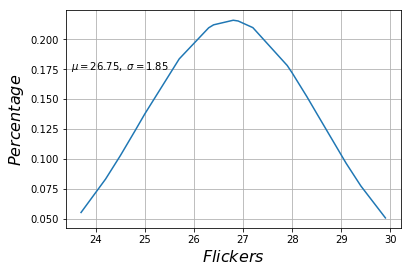

In [96]:
# density plot
flick = flicker['Flicker'].sort_values()
plt.plot(flick, norm.pdf(flick.values, flick.mean(), flick.std()))
plt.grid(True)
plt.xlabel('$Flickers$', fontsize=16)
plt.ylabel('$Percentage$', fontsize=16)
plt.text(23.5, .175, r'$\mu=26.75,\ \sigma=1.85$')

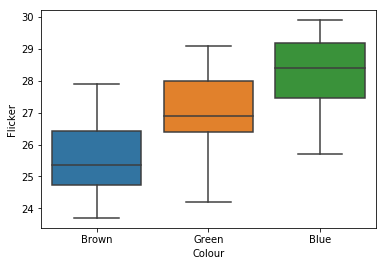

In [99]:
# box plot by colour to identify outliers if any
sns.boxplot(x="Colour", y="Flicker", data=flicker)

In [52]:
# perform one-way annova test to test against null hypothesis that the groups have the 
# same population mean
# seperate out Colour Nominal Categories(?)
green = flicker.loc[flicker['Colour'] == 'Green'].drop('Colour', axis=1)
brown = flicker.loc[flicker['Colour'] == 'Brown'].drop('Colour', axis=1)
blue = flicker.loc[flicker['Colour'] == 'Blue'].drop('Colour', axis=1)

# perform one-way annova test to test against null hypothesis that the groups have the 
# same population mean
f_oneway(green, brown, blue)

F_onewayResult(statistic=array([4.80234614]), pvalue=array([0.02324895]))